In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_alterp_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Terpinene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42968,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00
74997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.00


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Alpha-Terpinene'], axis = 1)
y = df_rf[['X..Alpha-Terpinene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.75],
       [0.75],
       [0.75],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

<Axes: ylabel='Count'>

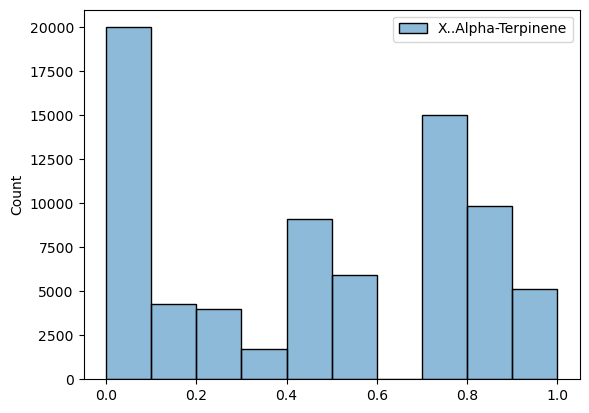

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1538/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.034196725181160424

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.007847392207744526

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0885855078878285

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9877661784951498

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9356414503770418

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.083551
1,lsa_1,0.091090
2,lsa_2,0.097207
3,lsa_3,0.078376
4,lsa_4,0.084423
...,...,...
81,tree,0.000670
82,tropical,0.002026
83,vanilla,0.004010
84,violet,0.000221


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
7,sativa,1.686736e-01
2,lsa_2,9.720705e-02
1,lsa_1,9.109019e-02
4,lsa_4,8.442302e-02
5,hybrid,8.435300e-02
0,lsa_0,8.355119e-02
3,lsa_3,7.837601e-02
58,lemon,4.522173e-02
50,diesel,3.187747e-02
16,dry mouth,1.269220e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([8.55835228e-02, 9.20416733e-02, 9.46789127e-02, 7.52888153e-02,
       8.58773849e-02, 8.48208578e-02, 0.00000000e+00, 1.69345273e-01,
       3.27436514e-03, 2.19467931e-03, 5.80981200e-03, 4.08635790e-07,
       5.53450286e-03, 3.33553214e-04, 5.33934722e-03, 4.83369867e-03,
       1.22503754e-02, 5.75137006e-03, 4.09334079e-07, 5.41214132e-03,
       4.72964081e-07, 4.84253985e-07, 6.45119026e-03, 5.66457087e-03,
       6.86319882e-03, 2.13675332e-03, 5.04381504e-03, 2.83884393e-04,
       9.77886354e-09, 3.71291392e-03, 1.07766974e-02, 5.33561994e-07,
       5.06402614e-03, 2.87653725e-06, 6.19852967e-07, 5.33448914e-03,
       3.54413710e-03, 5.09060242e-03, 6.21503639e-04, 1.69137851e-04,
       1.48173450e-04, 9.66387243e-03, 1.38052305e-03, 3.83816452e-03,
       2.57141734e-04, 3.79195268e-03, 2.03224895e-03, 4.53648754e-04,
       8.20599656e-03, 2.17732549e-03, 3.19182108e-02, 5.16262595e-03,
       3.04591750e-03, 1.31151184e-03, 5.02034319e-03, 9.15448678e-04,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,dry mouth,diesel,lemon
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,0,1,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_alterp.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_alterp.pkl")

['selected_X_rf_lsa_elbow_alterp.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1538/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03787817855967322

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.008835251793861564

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09399602009586132

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9819049878413594

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.927861362876325

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_alterp.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_alterp.pkl")

['rscv_rf_lsa_elbow_best_params_alterp.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 5, max_features = 'auto', min_samples_leaf = 2, max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1538/2645910482.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.04851922077471277

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.01048781148028562

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.10241001650368786

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9712182148400293

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9143684363219302

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_alterp.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_alterp.pkl")

['y_test_rfreg_lsa_elbow_alterp.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.04732110173268934

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.010057352977599191

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.10028635489237402

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9159013617770613

Error analysis

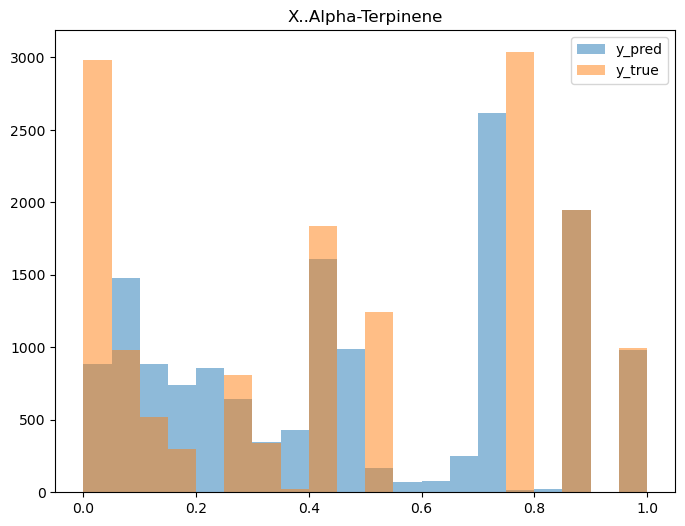

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Terpinene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_alterp.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.960
P-value: 0.000


<Axes: >

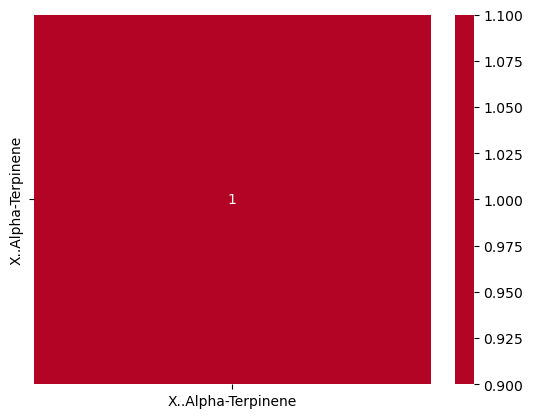

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)